In [119]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import itertools
import pickle

In [120]:
stock_a = pd.read_csv('../individual_stocks_5yr/AAPL_data.csv')
stock_b = pd.read_csv('../individual_stocks_5yr/LNT_data.csv')

In [121]:
stock_a.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [122]:
stock_b.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,23.140,23.210,23.0502,23.190,495972,LNT
1,2013-02-11,23.205,23.300,23.1250,23.255,530144,LNT
2,2013-02-12,23.220,23.415,23.2200,23.320,643436,LNT
3,2013-02-13,23.340,23.420,23.2250,23.305,874582,LNT
4,2013-02-14,23.265,23.560,23.1300,23.500,1191670,LNT


In [123]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [124]:
stock_b.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,32.785743,33.021742,32.542765,32.786640,1.230026e+06
std,5.934214,5.963851,5.899969,5.950278,1.527472e+06
min,23.140000,23.210000,23.050200,17.870000,2.932130e+05
25%,28.117500,28.387500,27.862500,28.155000,8.510420e+05
50%,31.110000,31.345000,30.853800,31.140000,1.093769e+06
75%,38.245000,38.550000,37.835000,38.235000,1.405287e+06
max,45.300000,45.550000,44.870000,45.180000,5.188082e+07


In [125]:
stock_b.open.dtype

dtype('float64')

In [126]:
b_dates = stock_b.date.unique()
a_dates = stock_a.date.unique()

In [127]:
res = [ele for ele in b_dates if ele not in a_dates]
res

[]

In [128]:
indices = [i for i in range(len(stock_a.index)) if i %5 == 0 or i == stock_a.index[-1]]
len(indices)

253

In [129]:
change = []
dates = []
for i in range(len(indices)-1):
    opening = indices[i]
    closing = indices[i+1]
    change.append(stock_a.open.iloc[closing] - stock_a.close.iloc[opening])
for i in range(len(indices)):
    dates.append(stock_a.date.iloc[indices[i]])

In [130]:
def percent_change(stock_df):
    indices = [i for i in range(len(stock_df.index)) if i %30 == 0 or i == stock_df.index[-1]]
    change = []
    for i in range(len(indices)-1):
        opening = indices[i]
        closing = indices[i+1]
        change.append((stock_df.close.iloc[closing] - stock_df.open.iloc[opening] / stock_df.open.iloc[opening]))
    return change

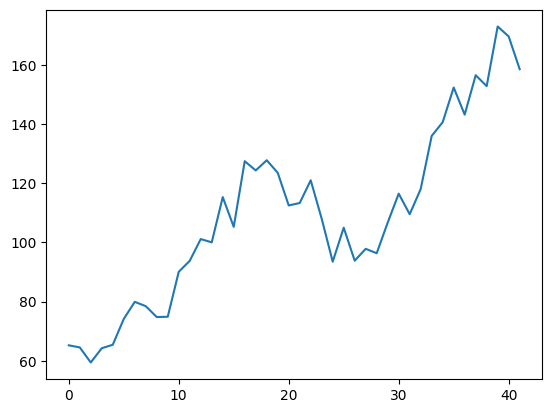

In [131]:
plt.plot(percent_change(stock_a))

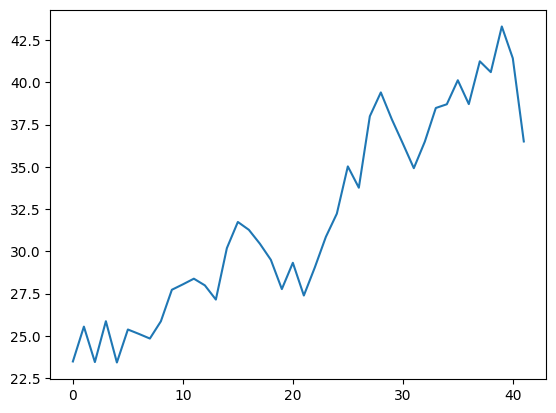

In [132]:
plt.plot(percent_change(stock_b))

In [133]:
stocks = pd.concat([stock_a, stock_b], ignore_index=True)
stocks['daily_change'] = stocks['close'] - stocks['open']
stocks.head()

,date,open,high,low,close,volume,Name,daily_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [134]:
stock_a['daily_change'] = 100*(stock_a['close'] - stock_a['open'])/stock_a['open']
stock_b['daily_change'] = 100*(stock_b['close'] - stock_b['open'])/stock_b['open']

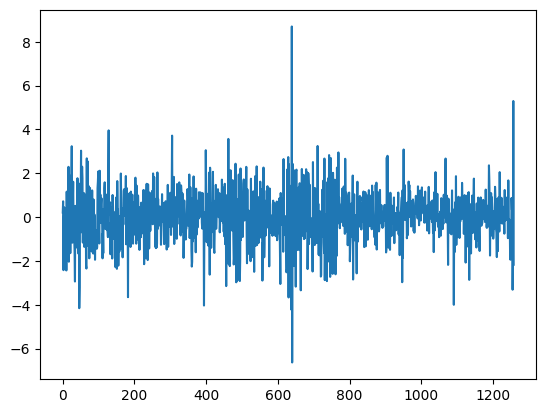

In [135]:
plt.plot(stock_a['daily_change'])

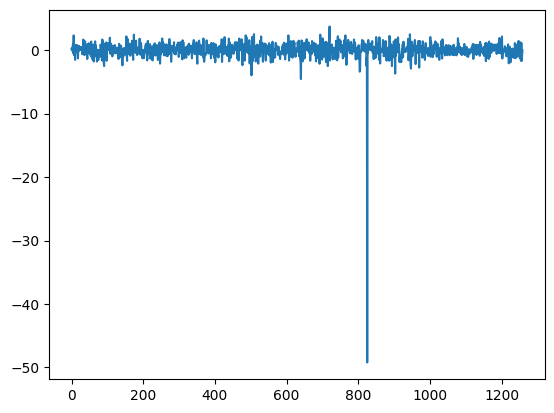

In [136]:
plt.plot(stock_b['daily_change'])

In [137]:
corr = stock_a['close'].corr(stock_b['close'])

In [138]:
corr

0.8212339877003252

# Correlation here

In [139]:
def correlation(stock_a, stock_b):
    corr = stock_a['close'].corr(stock_b['close'])
    return corr

def csv_loader(filepath):
    filenames = os.listdir(filepath)
    csv_names = [filename for filename in filenames if filename.endswith('.csv')]
    csv_files = []
    for name in csv_names:
        csv_files.append(pd.read_csv(filepath+name))
    return csv_files

In [140]:

project_directory = os.path.dirname(os.path.abspath("main.py")) 
stocks_directory = os.path.dirname(os.path.abspath(project_directory)) 
stocks_directory

'/Users/thomascanro/Desktop/CLASSES/Data Structures & Algorithms/DeFAANG'

In [141]:
files = csv_loader(stocks_directory+'/individual_stocks_5yr/')

In [142]:
adj_list = {}
for i, stock1 in enumerate(files):
    adjacent_corrs = {}
    for j, stock2 in enumerate(files):
        if i == j:
            continue
        adjacent_corrs[stock2.Name.iloc[0]] = correlation(stock1, stock2)
    adj_list[stock1.Name.iloc[0]] = adjacent_corrs
    
with open('adj_list.pkl', 'wb') as file:
    pickle.dump(adj_list, file)

In [143]:
#Adjacency list for one stock
adj_list['AAL']

{'XRX': 0.008728692614540066,
 'GS': 0.6997286105055388,
 'SPGI': 0.7503390983377176,
 'MTB': 0.6601702134086777,
 'V': 0.7217944442653389,
 'CTAS': 0.7223512808613628,
 'ESRX': 0.433747472858096,
 'APH': 0.7521252862800734,
 'BBT': 0.7101151571206046,
 'RHI': 0.7870156431144578,
 'GGP': 0.48084888997689545,
 'HCA': 0.8000486650217851,
 'HD': 0.7000403060971372,
 'PEP': 0.7301711571054533,
 'INTC': 0.805385824150988,
 'MAC': 0.29109138291363423,
 'CLX': 0.6417480469399037,
 'UNP': 0.7952808942199552,
 'WAT': 0.6383500264816184,
 'EMN': 0.34325991641303644,
 'ADSK': 0.688951316094418,
 'ALK': 0.784943851011393,
 'VZ': -0.1124349618418514,
 'AFL': 0.5470903107634876,
 'ADP': 0.7473728906305447,
 'CSRA': 0.681663753196095,
 'AON': 0.7615163627693491,
 'APC': -0.37624851887002303,
 'WRK': 0.30696807694869527,
 'XYL': 0.6419547870581844,
 'OMC': 0.6262748371507495,
 'SLB': -0.10450262222370063,
 'NOV': -0.5243604035179752,
 'CMA': 0.6124131829625283,
 'INFO': 0.5177907761819782,
 'CRM': 0.7

In [144]:
#correlation of one stock to another
adj_list['AAL']['AAPL']

0.8351143006202053

# Standard Dev, latest value by name

In [145]:
features = pd.DataFrame(columns = ['Name', 'LastClosingVal', 'StandDev'])
for stock in files:
    std_dev = stock.close.std()
    name = stock.Name.iloc[0]
    lastVal = stock.close.iloc[-1]
    dict = {'Name' : name, 'LastClosingVal':lastVal, 'StandDev':std_dev}
    ser = pd.Series(dict)
    new_row_df = pd.DataFrame(ser).transpose()
    features = pd.concat([features, new_row_df], ignore_index=True)

In [146]:
features.head()

,Name,LastClosingVal,StandDev
0,XRX,31.18,7.949466
1,GS,257.1,31.859654
2,SPGI,182.69,31.714175
3,MTB,184.97,20.536369
4,V,119.65,19.985805


In [147]:
features.to_csv('../clean_data/stocks_clean.csv')